<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%203/source%20code/Lab3_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [53]:
from skimage import io, color
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, diamond, dilation, erosion, closing, opening, black_tophat, white_tophat

# Shape Separation

## Image Manipulation

### Import Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


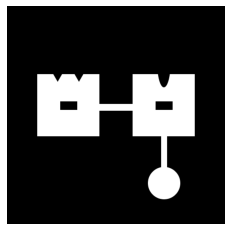

In [2]:
eye_image = color.rgb2gray(io.imread('./images/eye.png'))

plt.imshow(eye_image, cmap='gray')
plt.axis('off')
plt.show()

### Morphological Filtering (Closing, Erosion, Dilation)

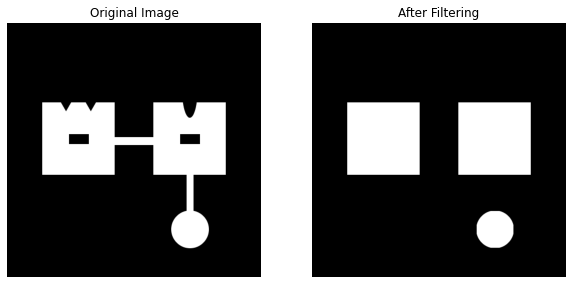

In [3]:
closed = closing(eye_image, square(30))
eroted = erosion(closed, square(17))
dilated = dilation(eroted, square(17))

# Show image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(eye_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Filtering')
plt.imshow(dilated, cmap='gray')
plt.axis('off')
plt.show()

## Reason

Operations

*   Closing. Pada tahap closing saya menggunakannya untuk menghilangkan kotak hitam serta segitiga yang terdapat pada kedua persegi. Alasannya adalah, saya menganggap/berpikir bahwa persegi panjang hitam & segitiga sebagai dark spots. Pada dokumentasi tertulis bahwa closing cukup ideal untuk menghilangkan dark spots.
*   Erosion. Pada tahap erosion saya menggunakannya untuk menghilangkan bridge diantara ketiga objek di atas. Pada dokumentasi tertulis bahwa erosion mengatur pixel ke level minimum untuk setiap titiknya. Maka dari itu bridge akan hilang karena pixelnya diatur ke level minimum, yakni background hitam. 
*   Dilation. Pada tahap dilation sebenarnya kebalikan dari erosion, yakni mengatur pixel ke nilai maximum. Alasannya adalah karena hasil dari erosion membuat lingkaran pada kanan bawah berubah bentuk, untuk mengembalikannya ke bentuk semula saya terapkan dilation.



# Aksara Jawa with a Hole

## Image Manipulation

### Import Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


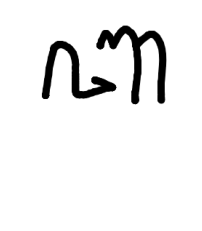

In [4]:
aksara_jawa_image = color.rgb2gray(io.imread('./images/aksara_jawa.png'))

plt.imshow(aksara_jawa_image, cmap='gray')
plt.axis('off')
plt.show()

### Morphological Filtering (Dilation)

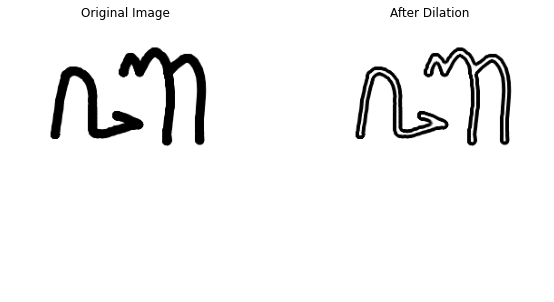

In [5]:
kernel = disk(4)
dilated = dilation(aksara_jawa_image, kernel)
final_ops = aksara_jawa_image - dilated

# Show image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(aksara_jawa_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Dilation')
plt.imshow(final_ops, cmap='gray')
plt.axis('off')
plt.show()

## Reason

Sederhananya step dilation adalah operasi untuk mengecilkan ukuran dari aksara jawa di atas. Setelah ukurannya mengecil, dilakukan operasi pengurangan kepada gambar aslinya. Sehingga hasil dari operasi tersebut menghasilkan ruang kosong di tengah aksara jawa tersebut.

Apabila alasan lebih baiknya, berdasarkan dokumentasi, dilation adalah operasi yang membuat ukuran region terang membesar dan region gelap mengecil. Dengan demikian membuat ukuran dari aksara jawa yang berlatar hitam mengecil. Dari hasil dilation itulah diterapkan proses pengurangan terhadap gambar aslinya.

# Image Preprocessing

## Import Images

(-0.5, 639.5, 491.5, -0.5)

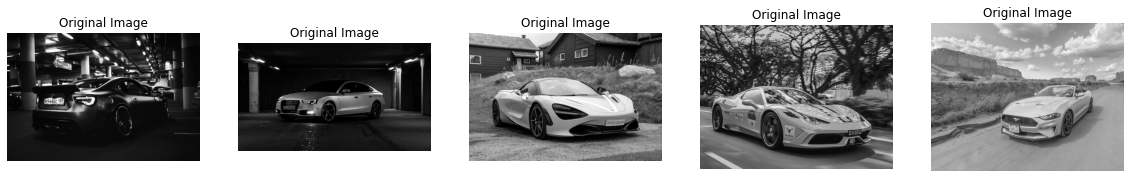

In [7]:
sm_car1_image = color.rgb2gray(io.imread('./images/small_car_1.jpg'))
sm_car2_image = color.rgb2gray(io.imread('./images/small_car_2.jpg'))
sm_car3_image = color.rgb2gray(io.imread('./images/small_car_3.jpg'))
sm_car4_image = color.rgb2gray(io.imread('./images/small_car_4.jpg'))
sm_car5_image = color.rgb2gray(io.imread('./images/small_car_5.jpg'))
cars = [sm_car1_image, sm_car2_image, sm_car3_image, sm_car4_image, sm_car5_image]

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(sm_car1_image, cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.title('Original Image')
plt.imshow(sm_car2_image, cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.title('Original Image')
plt.imshow(sm_car3_image, cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.title('Original Image')
plt.imshow(sm_car4_image, cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.title('Original Image')
plt.imshow(sm_car5_image, cmap='gray')
plt.axis('off')

## Strategi

Mengingat objektif utamanya adalah mengekstraksi plat nomor dari masing-masing mobil di atas, maka yang perlu saya lakukan adalah melakukan preprocessing fokus hanya pada plat nomornya. Namun yang jadi masalah di sini adalah terdapat beberapa mobil yang memang plat nomornya sudah blur.

Sehingga strategi saya adalah melakukan black_tophat untuk mempertegas bagian plat nomor mobil, baik itu dari fontnya maupun backgroundnya. Setelah itu diterapkan proses closing untuk memastikan noda-noda hitam hilang serta menghubungkan bagian-bagian yang terang, hal ini dilakukan harapannya font pada plate mobil saling terhubung. Setelah dilakukan closing yang harapannya bagian terang pada font mobil saling terhubung & mencolok, diterapkan white_tophat yang tujuannya agar mempertegas bright spot pada font plate mobil tersebut.

## Preprocessing

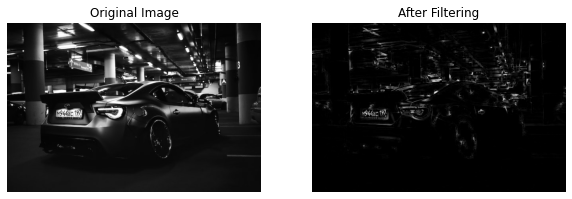

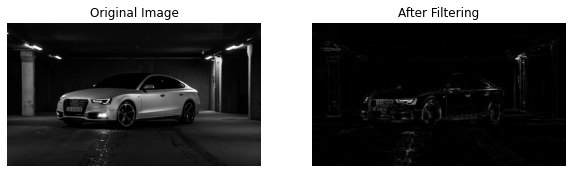

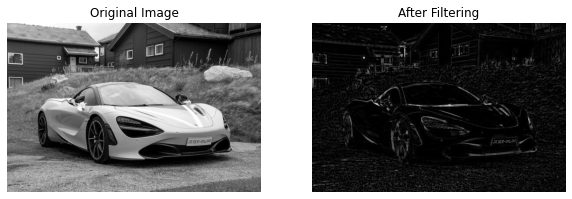

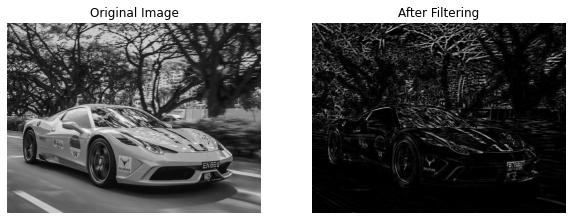

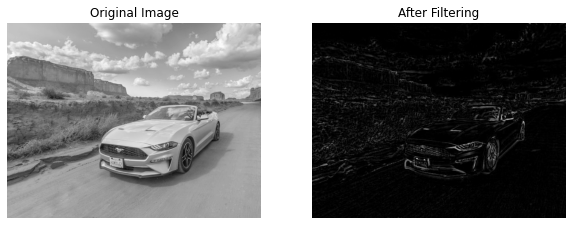

In [90]:
for img in cars:
  b_tophat = black_tophat(img, disk(4))
  closed = closing(b_tophat, square(2))
  w_tophat = white_tophat(closed, diamond(4))

  # Show image
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('After Filtering')
  plt.imshow(w_tophat, cmap='gray')
  plt.axis('off')
  plt.show()

## Pendapat Hasil Preprocessing

Terdapat beberapa mobil yang menurut saya secara kualitas sudah cukup baik untuk digunakan dalam plate recognition, namun ada pula mobil yang secara kualitas kurang baik untuk digunakan. Hal ini dikarenakan sejak awal kualitas gambar, khususnya plat mobil tersebut sudah buruk, dalam hal ini blur. Sehingga meskipun sudah diterapkan morphologic filtering hanya bisa tertolong sedikit, apabila ada teknologi yang memungkinkan untuk 'de-blur' itu bisa digunakan di awal sebelum morphological filtering. Namun secara keseluruhan sudah sangat baik dibanding gambar awalnya.